## Observations and Insights 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress
from matplotlib.pyplot import figure



# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
study_df = pd.merge(mouse_metadata, study_results, on='Mouse ID')

# Display the data table for preview
study_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [3]:
# Checking the number of mice.
num_mice = study_df["Mouse ID"].value_counts()
print(num_mice)

g989    13
b559    10
c282    10
z969    10
h246    10
        ..
x226     1
u153     1
l872     1
o848     1
d133     1
Name: Mouse ID, Length: 249, dtype: int64


In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mouse_duplicate = study_df.loc[study_df.duplicated(subset=["Mouse ID", "Timepoint"]),"Mouse ID"].unique()
print(mouse_duplicate)

['g989']


In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
all_mouse_df = study_df.loc[study_df["Mouse ID"]=="g989"]
all_mouse_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mice = study_df[study_df['Mouse ID'].isin(mouse_duplicate)==False]
clean_mice

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [7]:
# Checking the number of mice in the clean DataFrame.
clean_df = clean_mice["Mouse ID"].value_counts()
number_of_mice = len(clean_df)
number_of_mice

248

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:

drug_groups_df = clean_mice.groupby(['Drug Regimen'])

# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

tumor_mean_vol = drug_groups_df["Tumor Volume (mm3)"].mean()

tumor_median_vol = drug_groups_df["Tumor Volume (mm3)"].median()

tumor_variance_vol = drug_groups_df["Tumor Volume (mm3)"].var()

tumor_std = drug_groups_df["Tumor Volume (mm3)"].std()

tumor_sem = drug_groups_df["Tumor Volume (mm3)"].sem()

#summary_stats_table = pd.DataFrame({"Mean": regimen_mean, "Median":regimen_median, 
#"Variance":regimen_variance, "Standard Deviation": regimen_std, "SEM": regimen_sem})

summary_df = pd.DataFrame({"Tumor Volume Mean": tumor_mean_vol, "Tumor Volume Median": tumor_median_vol,
                            "Tumor Volume Variance": tumor_variance_vol, "Standard Deviation": tumor_std,
                            "Tumor SEM": tumor_sem})

summary_df



,Tumor Volume Mean,Tumor Volume Median,Tumor Volume Variance,Standard Deviation,Tumor SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line

drug_groups2 = clean_mice.groupby('Drug Regimen')
summary_df2 = drug_groups2.agg(['mean','median','var','std','sem'])["Tumor Volume (mm3)"]
summary_df2

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

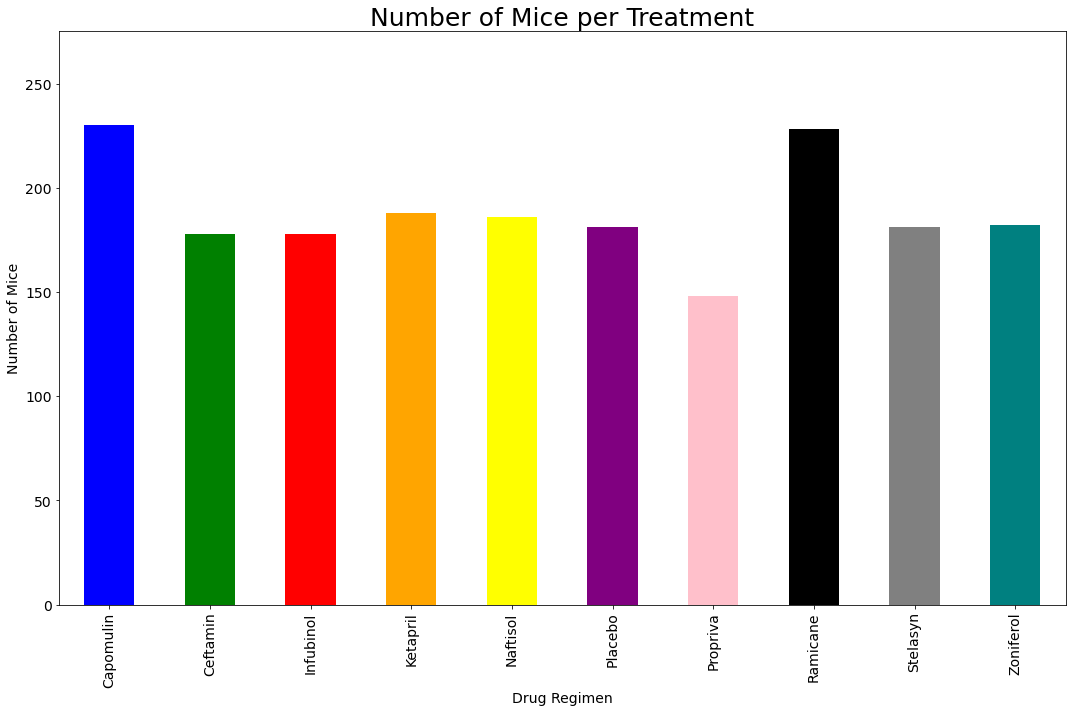

In [12]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
measurements_df = clean_mice.groupby(["Drug Regimen"]).count()["Mouse ID"] 


bar_plot_drug = measurements_df.plot.bar(figsize=(15,10), color=["blue", "green", "red", "orange", "yellow", "purple",
                                                               "pink", "black", "grey", "teal"],fontsize = 14)
plt.xlabel("Drug Regimen",fontsize = 14)
plt.ylabel("Number of Mice",fontsize = 14)
plt.title("Number of Mice per Treatment",fontsize = 25)
plt.ylim(0, 275)
plt.tight_layout()

plt.show()




Text(104.875, 0.5, 'Number of Mice')

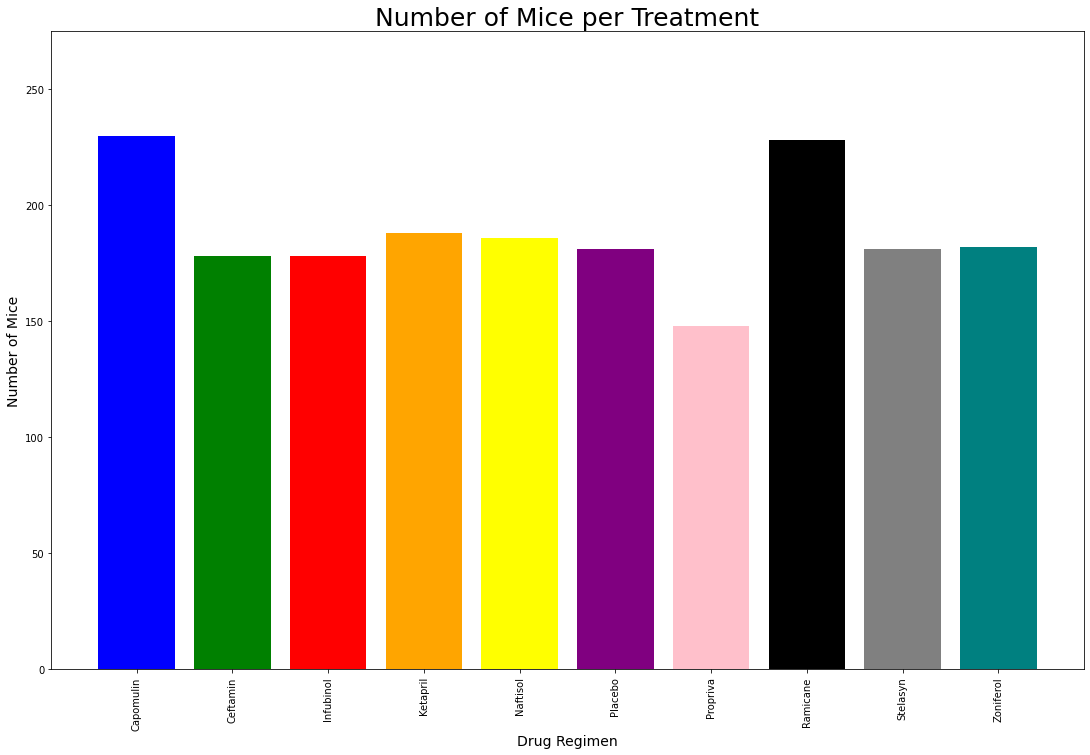

In [13]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
mouse_list =(clean_mice.groupby(["Drug Regimen"])["Mouse ID"].count()).tolist()
#mouse_list

x_axis = np.arange(len(measurements_df))
fig1, ax1 = plt.subplots(figsize=(15, 10))
plt.bar(x_axis, mouse_list, color=["blue", "green", "red", "orange", "yellow", "purple",
                                "pink", "black", "grey", "teal"], alpha=1, align='center')

tick_locations = [value for value in x_axis]

plt.xticks(tick_locations, ['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 
                            'Naftisol', 'Placebo', 'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol'],  rotation=90)

#plt.xlim(-0.75, len(x_axis)-0.25)

plt.ylim(0, 275)
plt.tight_layout()
plt.title("Number of Mice per Treatment",fontsize = 25)
plt.xlabel("Drug Regimen",fontsize = 14)
plt.ylabel("Number of Mice",fontsize = 14)


        Total Count  Percentage of Sex
Sex                                   
Female          123          49.596774
Male            125          50.403226


Text(0.5, 1.0, 'Female vs. Male Mouse Population')

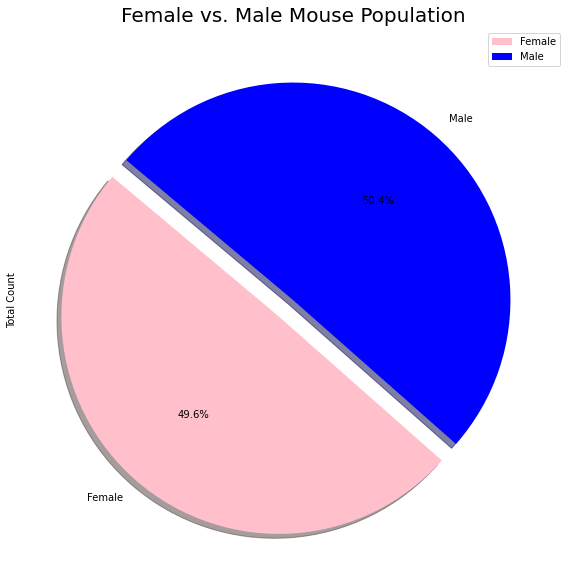

In [30]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
groupby_gender = clean_mice.groupby(["Mouse ID","Sex"])

gender_df = pd.DataFrame(groupby_gender.size())

mouse_sex = pd.DataFrame(gender_df.groupby(["Sex"]).count())
mouse_sex.columns = ["Total Count"]

mouse_sex["Percentage of Sex"] = (100*(mouse_sex["Total Count"]/mouse_sex["Total Count"].sum()))

print(mouse_sex)

colors = ["pink", "blue"]
explode = (0.1, 0)
plot = mouse_sex.plot.pie(y='Total Count',figsize=(15,10), colors = colors, startangle=140, explode = explode, shadow = True, autopct="%1.1f%%")
plt.title('Female vs. Male Mouse Population',fontsize = 20)



Text(0.5, 1.0, 'Male vs Female Mouse Population')

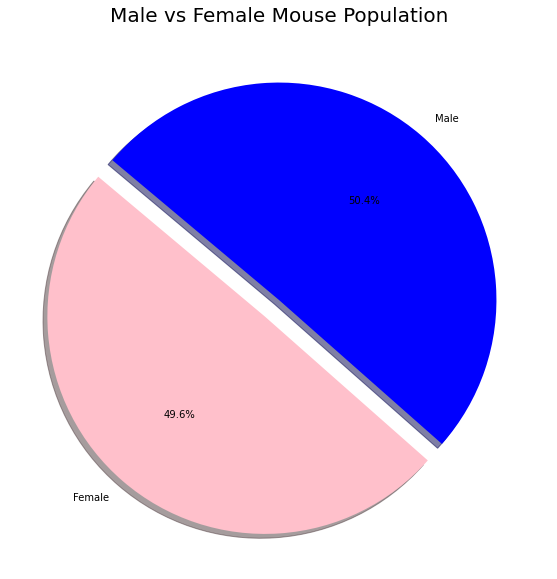

In [31]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ["Female","Male"]

sizes = [49.596774,50.403226]

colors = ["pink", "blue"]

explode = (0.1, 0)
 
fig1, ax1 = plt.subplots(figsize=(15, 10))
plt.pie(sizes, explode=explode,labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=140,)
plt.title('Male vs Female Mouse Population',fontsize = 20)
#plt.ylabel('Sex',fontsize = 14)
#plt.axis("equal",fontsize = 14)


## Quartiles, Outliers and Boxplots

In [39]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

Capomulin_df = clean_mice.loc[clean_mice["Drug Regimen"] == "Capomulin",:]
Ramicane_df = clean_mice.loc[clean_mice["Drug Regimen"] == "Ramicane", :]
Infubinol_df = clean_mice.loc[clean_mice["Drug Regimen"] == "Infubinol", :]
Ceftamin_df = clean_mice.loc[clean_mice["Drug Regimen"] == "Ceftamin", :]

# Start by getting the last (greatest) timepoint for each mouse
last_time = clean_mice.groupby(["Mouse ID"]["Timepoint"].max())
#last_time = clean_mice.loc[clean_mice["Mouse ID", "Timepoint"]]
last_time.head()


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


TypeError: list indices must be integers or slices, not str

In [ ]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [ ]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [ ]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
